In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [5]:
#importing data
df = pd.read_csv("Data/Data_USD.csv")
df.head()

,LIMIT_BAL_US,SEX,EDUCATION,MARRIAGE,AGE,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,DEFAULT_PAYMENT_NEXT_MO
0,725.714286,2,2,1,24,-0.33,46.590857,4.166810,0.09,0.195650,1
1,4354.285714,2,2,2,26,0.50,103.275191,30.238095,0.29,0.022350,1
2,3265.714286,2,2,2,34,0.00,614.758619,66.632667,0.11,0.324878,0
3,1814.285714,2,2,1,37,0.00,1399.019905,50.727429,0.04,0.939800,0
4,1814.285714,1,2,1,57,-0.33,661.240619,357.105857,0.54,0.172340,0


In [25]:
df_features=df[['PAY_SCORE_AVG','PAY_AMT_AVG_US','CREDIT_UTILIZATION','BILL_AVG_US','AGE','DEFAULT_PAYMENT_NEXT_MO']]
df_features.head()

,PAY_SCORE_AVG,PAY_AMT_AVG_US,CREDIT_UTILIZATION,BILL_AVG_US,AGE,DEFAULT_PAYMENT_NEXT_MO
0,-0.33,4.166810,0.195650,46.590857,24,1
1,0.50,30.238095,0.022350,103.275191,26,1
2,0.00,66.632667,0.324878,614.758619,34,0
3,0.00,50.727429,0.939800,1399.019905,37,0
4,-0.33,357.105857,0.172340,661.240619,57,0


In [34]:
#assigning data
X = df_features.drop('DEFAULT_PAYMENT_NEXT_MO',axis =1).values
y = df_features['DEFAULT_PAYMENT_NEXT_MO'].values.reshape(-1, 1)
print(X.shape)
print(y.shape)

(30000, 5)
(30000, 1)


In [35]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.30)

In [36]:
#processing data with StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


/Users/monaderakhshan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [42]:
#creating model
model=LinearRegression()

In [43]:
#fit the model to training data
model.fit(X_train_scaled,y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
#Checking training and testing scores
train=model.score(X_train_scaled,y_train_scaled)
test=model.score(X_test_scaled,y_test_scaled)

print('Testing Score is:', test)
print('Training Score is:', train) 
##hmm, the scores are awfully low....

Testing Score is: 0.0853119855367
Training Score is: 0.0959931860664


In [54]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge

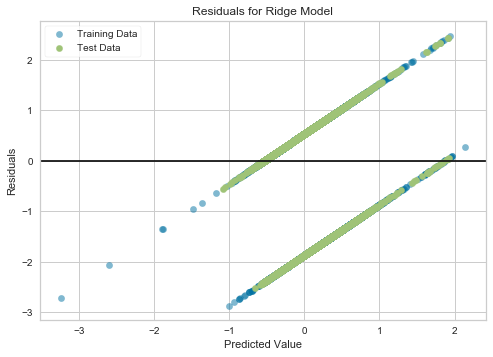

In [55]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train_scaled, y_train_scaled)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test_scaled)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [56]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9002314909040248, R2: 0.0853119855366874
